<a href="https://colab.research.google.com/github/gomescheelsy03/Repo2/blob/main/Activity_11_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

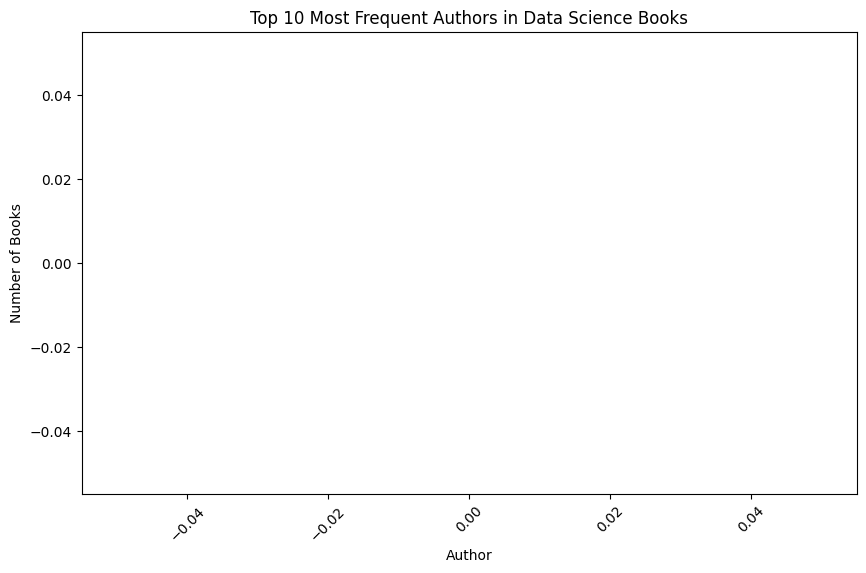

In [1]:
#author: Chelsy Gomes
# Importing necessary libraries
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# URL of the webpage to scrape
url = "http://www.allitebooks.in/"

# Fetching the webpage
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

# Initializing lists to store the scraped data
titles = []
authors = []
ratings = []
links = []

# Looping through each book entry in the webpage
for book in soup.find_all('article'):
    # Extracting the book title
    title = book.h2.a.text
    titles.append(title)

    # Extracting the book link
    link = book.h2.a['href']
    links.append(link)

    # Extracting the author(s)
    author = book.find('h5', class_='entry-author').text.strip()
    authors.append(author)

    # Extracting the rating
    # Assuming ratings are stored in a specific format (e.g., "Rating: 4.5")
    rating = book.find('span', class_='rating')
    ratings.append(float(rating.text.split()[1]) if rating else None)

# Creating a DataFrame from the scraped data
data = pd.DataFrame({
    'Title': titles,
    'Author': authors,
    'Rating': ratings,
    'Link': links
})

# Data cleaning: Handling missing values and data transformation
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

# Author Frequency Analysis
# Splitting multiple authors and counting frequency
author_list = []
for author in data['Author']:
    for name in author.split(','):
        author_list.append(name.strip())

author_count = Counter(author_list)

# Selecting top authors
top_authors = author_count.most_common(10)

# Converting to DataFrame for visualization
top_authors_df = pd.DataFrame(top_authors, columns=['Author', 'Count'])

# Plotting the most frequent authors
plt.figure(figsize=(10, 6))
plt.bar(top_authors_df['Author'], top_authors_df['Count'], color='blue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 10 Most Frequent Authors in Data Science Books')
plt.xticks(rotation=45)
plt.show()
